# For a given security (Nifty50 in this case), define a level of correction (30% in this case; 0.7 in loop)

The output will tell us the following about every instance when the markets corrected by x% -

The date the market formed a top

The date the market corrected by x% (Correction level is user input)

The number of days it took to touch that x% drop

What would be the 6,12,18,24 month return if we had bought at the x% drop?


The date the market formed the bottom

The days it took to reach the bottom (form the top) 

The days it took to reach back to its previous top (So if you had bought at the top before the correction, you had negative returns for these many days)

What would be the 6,12,18,24 month return if we had bought at the market bottom?

What would be the 6,12,18,24 month return if we had bought 2 months after the market bottom?

Scatter plot: y axis = no days to recovery; x axis = no. days to reach bottom

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import date

In [2]:
data=pd.read_excel(r'C:\Users\Vedant Wanchoo\Desktop\Recent Research\Index_Correction\Index_Correction.xlsx',sheet_name='Sheet3',index_col=0)
data=data.dropna()

In [16]:
data.shape

(6228, 4)

In [24]:
output=pd.DataFrame()
q=0
try:
    while q in range(0,len(data)): #This loop goes out of bounds when there are no more corrections left and the dataset ends, however, even when it goes out of bounds, it still gives me the output that I need
        for i in range (q,len(data)):
            if data.dd[i] < 0.7:
                thirty_percent_date=data.iloc[q:i+1]  #"data.loc[data['dd'] < 0.7]"
                break

        Peak=thirty_percent_date.loc[thirty_percent_date['nifty'] == (max(thirty_percent_date['nifty']))]
        Peak=Peak.iloc[0:1]
        TimeToThirty=(((data.iloc[i:i+1].index - Peak.index).days).tolist())[0]

        six_month_ret=(((data.iloc[i+126].nifty)/(data.iloc[i].nifty))-1) #06 months
        twelve_month_ret=(((data.iloc[i+252].nifty)/(data.iloc[i].nifty))-1) #12 months
        eighteen_month_ret=(((data.iloc[i+378].nifty)/(data.iloc[i].nifty))-1) #18 months
        twentyfour_month_ret=(((data.iloc[i+504].nifty)/(data.iloc[i].nifty))-1) #24 months

        for j in range (i,len(data)):
            if data.dd[j] == 1:
                recover = data.iloc[i:j+1]
                break

        Bottom=recover.loc[recover['nifty'] == (min(recover['nifty']))]
        Bottom=Bottom.iloc[0:1]
        Max_Fall=(1-Bottom.dd)
        Max_Fall=Max_Fall.iloc[0]
        TimeToFall=(((Bottom.index-Peak.index).days).tolist())[0]
        BackToTop=((((recover.iloc[-1:]).index-Peak.index).days).tolist())[0]
        RecoTime=((((recover.iloc[-1:]).index-Bottom.index).days).tolist())[0]

        a=(data.iloc[j:j+1].index - Bottom.index)
        b=np.round(a.days*252/365)
        c=j-b

        b_six_month_ret=(((data.iloc[j-b+126].nifty.iloc[0])/(data.iloc[j-b].nifty.iloc[0]))-1) #06 months
        b_twelve_month_ret=(((data.iloc[j-b+252].nifty.iloc[0])/(data.iloc[j-b].nifty.iloc[0]))-1) #12 months
        b_eighteen_month_ret=(((data.iloc[j-b+378].nifty.iloc[0])/(data.iloc[j-b].nifty.iloc[0]))-1) #18 months
        b_twentyfour_month_ret=(((data.iloc[j-b+504].nifty.iloc[0])/(data.iloc[j-b].nifty.iloc[0]))-1) #24 months


        #What if we buy 2 months after the bottom. 42 days in 2 months

        late_six_month_ret=(((data.iloc[j-b+126+42].nifty.iloc[0])/(data.iloc[j-b+42].nifty.iloc[0]))-1) #06 months
        late_twelve_month_ret=(((data.iloc[j-b+252+42].nifty.iloc[0])/(data.iloc[j-b+42].nifty.iloc[0]))-1) #12 months
        late_eighteen_month_ret=(((data.iloc[j-b+378+42].nifty.iloc[0])/(data.iloc[j-b+42].nifty.iloc[0]))-1) #18 months
        late_twentyfour_month_ret=(((data.iloc[j-b+504+42].nifty.iloc[0])/(data.iloc[j-b+42].nifty.iloc[0]))-1) #24 months


        rr=[[Peak.index,data.iloc[i:i+1].index,TimeToThirty,six_month_ret,twelve_month_ret,eighteen_month_ret,twentyfour_month_ret,Peak.index,Bottom.index,TimeToFall,RecoTime,BackToTop,Max_Fall,b_six_month_ret,b_twelve_month_ret,b_eighteen_month_ret,b_twentyfour_month_ret,late_six_month_ret,late_twelve_month_ret,late_eighteen_month_ret,late_twentyfour_month_ret]]
        op=pd.DataFrame(rr)
        output=output.append(op)
        q=j
except:
    print("")

In [25]:
output

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,"DatetimeIndex(['1996-06-14'], dtype='datetime6...","DatetimeIndex(['1996-11-27'], dtype='datetime6...",166,0.251025,0.233174,0.399503,-0.009866,"DatetimeIndex(['1996-06-14'], dtype='datetime6...","DatetimeIndex(['1996-12-04'], dtype='datetime6...",173,...,382,0.341012,0.298099,0.223255,0.341525,0.027393,0.277483,-0.015836,-0.013384,-0.024571
0,"DatetimeIndex(['1997-08-06'], dtype='datetime6...","DatetimeIndex(['1998-06-22'], dtype='datetime6...",320,-0.039934,0.321518,0.600602,0.448932,"DatetimeIndex(['1997-08-06'], dtype='datetime6...","DatetimeIndex(['1998-10-20'], dtype='datetime6...",440,...,705,0.374531,0.177250,0.744378,0.934401,0.537447,0.396237,0.623795,0.661073,0.472709
0,"DatetimeIndex(['2000-02-11'], dtype='datetime6...","DatetimeIndex(['2000-05-23'], dtype='datetime6...",102,0.018499,-0.064889,-0.185234,-0.122672,"DatetimeIndex(['2000-02-11'], dtype='datetime6...","DatetimeIndex(['2001-09-21'], dtype='datetime6...",588,...,1406,0.513554,0.179466,-0.017797,0.012602,0.411501,0.008457,-0.047295,-0.078366,0.416280
0,"DatetimeIndex(['2008-01-08'], dtype='datetime6...","DatetimeIndex(['2008-06-20'], dtype='datetime6...",164,-0.314280,0.046785,0.178422,0.150786,"DatetimeIndex(['2008-01-08'], dtype='datetime6...","DatetimeIndex(['2008-10-27'], dtype='datetime6...",293,...,1032,0.598559,0.605060,0.812434,0.902727,1.223060,0.513802,0.881964,0.872667,1.144783


In [19]:
output.describe()

,2,3,4,5,6,9,10,11,12,13,14,15,16,17,18,19,20
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,188.000000,-0.021173,0.134147,0.248323,0.116795,373.500000,507.750000,881.250000,0.456914,0.314969,0.440567,0.547814,0.549850,0.298995,0.360657,0.360498,0.502300
std,92.879851,0.232329,0.175273,0.336558,0.248232,179.919426,315.124711,439.091012,0.120404,0.201466,0.403282,0.448858,0.498487,0.216390,0.465179,0.477860,0.482581
min,102.000000,-0.314280,-0.064889,-0.185234,-0.122672,173.000000,209.000000,382.000000,0.341012,0.177250,-0.017797,0.012602,0.027393,0.008457,-0.047295,-0.078366,-0.024571
25%,148.500000,-0.108521,0.018866,0.087508,-0.038068,263.000000,251.000000,624.250000,0.366151,0.178912,0.162992,0.259294,0.315474,0.210226,-0.023701,-0.029629,0.306067
50%,165.000000,-0.010718,0.139980,0.288963,0.070460,366.500000,502.000000,868.500000,0.444042,0.238783,0.483817,0.622126,0.474474,0.336860,0.303980,0.323845,0.444495
75%,204.500000,0.076630,0.255260,0.449778,0.225323,477.000000,758.750000,1125.500000,0.534805,0.374840,0.761392,0.910645,0.708850,0.425629,0.688337,0.713971,0.640728
max,320.000000,0.251025,0.321518,0.600602,0.448932,588.000000,818.000000,1406.000000,0.598559,0.605060,0.812434,0.934401,1.223060,0.513802,0.881964,0.872667,1.144783


Text(0.5, 0, 'No. Days To Reach Bottom')

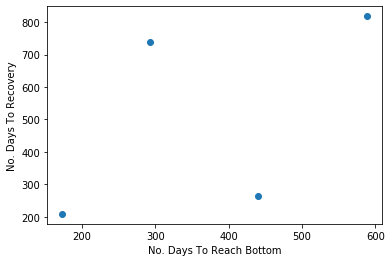

In [20]:
plt.scatter(output.iloc[:,9],output.iloc[:,10])
plt.ylabel('No. Days To Recovery')
plt.xlabel('No. Days To Reach Bottom')

In [21]:
output.describe().iloc[:,9:19]
#13-16 are returns if we invest at bottom
#17-20 are returns if we invest 2 months after bottom

#These returns are not annualized, they are absolute returns

,13,14,15,16,17,18,19,20
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.314969,0.440567,0.547814,0.549850,0.298995,0.360657,0.360498,0.502300
std,0.201466,0.403282,0.448858,0.498487,0.216390,0.465179,0.477860,0.482581
min,0.177250,-0.017797,0.012602,0.027393,0.008457,-0.047295,-0.078366,-0.024571
25%,0.178912,0.162992,0.259294,0.315474,0.210226,-0.023701,-0.029629,0.306067
50%,0.238783,0.483817,0.622126,0.474474,0.336860,0.303980,0.323845,0.444495
75%,0.374840,0.761392,0.910645,0.708850,0.425629,0.688337,0.713971,0.640728
max,0.605060,0.812434,0.934401,1.223060,0.513802,0.881964,0.872667,1.144783


Apart from the 18 month scenario, investing 2 months late seems like a decent strategy. I rather buy on the way up after a clear bottom has been formed and miss out on some potential gains, rather than averaging down at every subsequent drawdown. (By buy, I mean shifting some assets from debt to equity)